# 1. Connection setup

In [2]:
import mysql.connector

try:
    conn = mysql.connector.connect(host='localhost',user='root',port=3307,password='inix2025')
    print("Connected")
except:
    print("Connection failed")
#conn.close()
cursor = conn.cursor()

Connected


# 2. Check connection

In [3]:
# Check connection status
if conn.is_connected():
    print("Connection is open")
else:
    print("Connection is closed")

Connection is open


# 3. Show all database(schema)

In [4]:
cursor = conn.cursor()
cursor.execute("SHOW DATABASES")

for schema in cursor:
    print(schema[0])

information_schema
mysql
performance_schema
sys


# 4. Create database sales_system

In [36]:
cursor.execute("CREATE DATABASE IF NOT EXISTS sales_system")

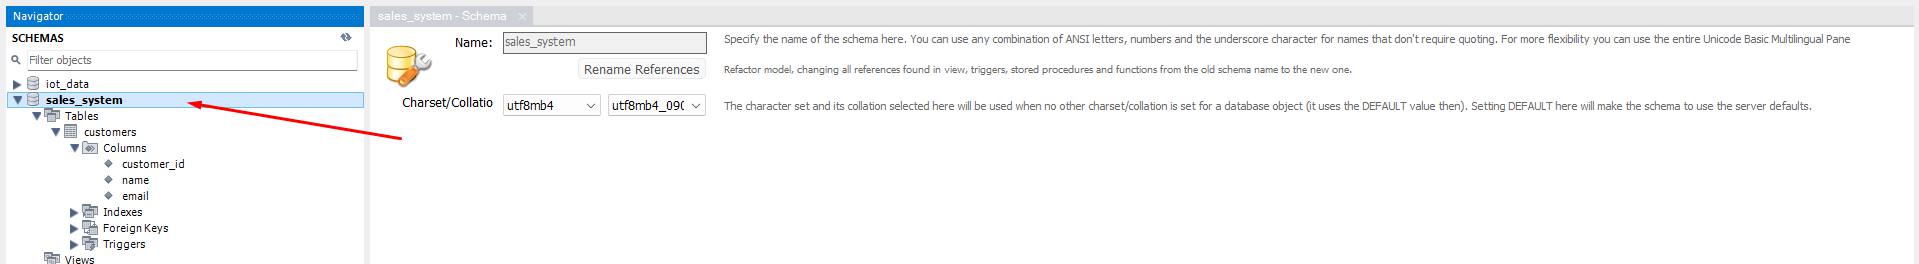

# 5. Set sales_system as default

In [5]:
cursor.execute("USE sales_system")

# 6. Drop Existing table

In [26]:
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS customers")

# 7. Create cutomers table

In [29]:
cursor.execute("""
CREATE TABLE customers (
    customer_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    email VARCHAR(100) UNIQUE
)
""")

cursor.execute("DESCRIBE customers")
for row in cursor.fetchall():
    print(row)

('customer_id', 'int', 'NO', 'PRI', None, 'auto_increment')
('name', 'varchar(100)', 'NO', '', None, '')
('email', 'varchar(100)', 'YES', 'UNI', None, '')


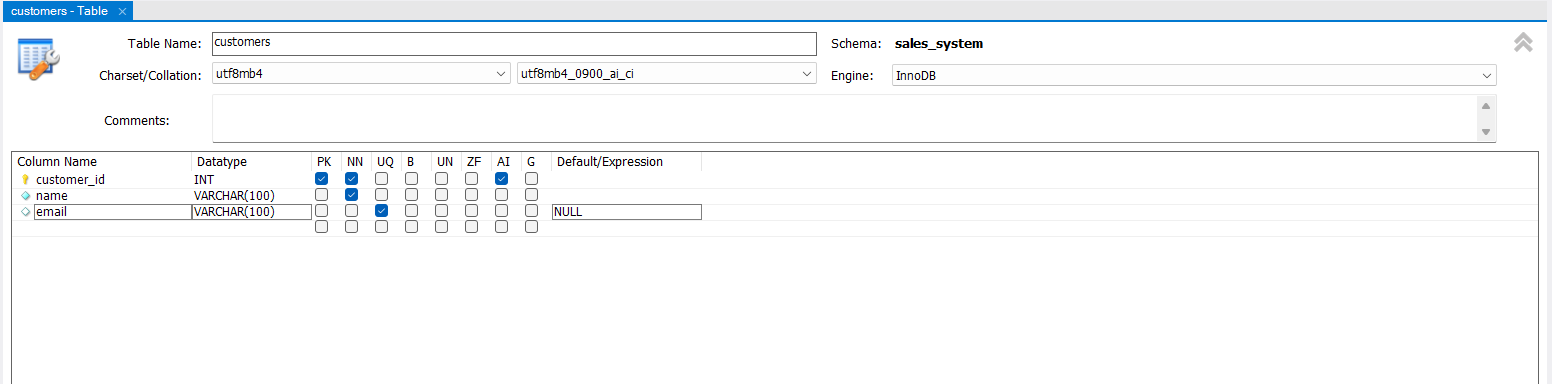

In [9]:
cursor.execute("SHOW CREATE TABLE customers")
print(cursor.fetchone()[1])

CREATE TABLE `customers` (
  `customer_id` int NOT NULL AUTO_INCREMENT,
  `name` varchar(100) NOT NULL,
  `email` varchar(100) DEFAULT NULL,
  PRIMARY KEY (`customer_id`),
  UNIQUE KEY `email` (`email`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


# 8. Create orders table with foreign key

In [ ]:
cursor.execute("""
CREATE TABLE orders (
    order_id INT AUTO_INCREMENT PRIMARY KEY,
    customer_id INT NOT NULL,
    order_date DATETIME DEFAULT CURRENT_TIMESTAMP,
    amount DECIMAL(10, 2) NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
        ON DELETE RESTRICT
        ON UPDATE CASCADE
)
""")

In [7]:
cursor.execute("SHOW CREATE TABLE orders")
print(cursor.fetchone()[1])

CREATE TABLE `orders` (
  `order_id` int NOT NULL AUTO_INCREMENT,
  `customer_id` int NOT NULL,
  `order_date` datetime DEFAULT CURRENT_TIMESTAMP,
  `amount` decimal(10,2) NOT NULL,
  PRIMARY KEY (`order_id`),
  KEY `customer_id` (`customer_id`),
  CONSTRAINT `orders_ibfk_1` FOREIGN KEY (`customer_id`) REFERENCES `customers` (`customer_id`) ON DELETE RESTRICT ON UPDATE CASCADE
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


# 9. Insert sample cutomers

In [10]:
cursor.execute("""
INSERT INTO customers (name, email) VALUES
('Alice Johnson', 'alice@example.com'),
('Bob Smith', 'bob@example.com'),
('Charlie Lee', 'charlie@example.com')
""")
conn.commit()

In [11]:
cursor.execute("select * from customers")

In [17]:
import pandas as pd

cursor.execute("SELECT * FROM customers")
rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]  # Get column names

df = pd.DataFrame(rows, columns=columns)
print(df)

   customer_id           name                email
0            1  Alice Johnson    alice@example.com
1            2      Bob Smith      bob@example.com
2            3    Charlie Lee  charlie@example.com


# 10. Insert valid orders

In [18]:
cursor.execute("""
INSERT INTO orders (customer_id, amount) VALUES
(1, 150.00),
(2, 299.99),
(3, 75.50)
""")
conn.commit()

In [14]:
cursor.execute("select * from orders")
print(cursor.fetchall())

[(1, 1, datetime.datetime(2025, 7, 19, 23, 20, 13), Decimal('150.00')), (2, 2, datetime.datetime(2025, 7, 19, 23, 20, 13), Decimal('299.99')), (3, 3, datetime.datetime(2025, 7, 19, 23, 20, 13), Decimal('75.50'))]


# 11. Insert INVALID orders

In [15]:
cursor.execute("INSERT INTO orders (customer_id, amount) VALUES (999, 49.99)")
conn.commit()

IntegrityError: 1452 (23000): Cannot add or update a child row: a foreign key constraint fails (`sales_system`.`orders`, CONSTRAINT `orders_ibfk_1` FOREIGN KEY (`customer_id`) REFERENCES `customers` (`customer_id`) ON DELETE RESTRICT ON UPDATE CASCADE)

In [19]:
import pandas as pd

cursor.execute("SELECT * FROM orders")
rows = cursor.fetchall()
columns = [col[0] for col in cursor.description]  # Get column names

df = pd.DataFrame(rows, columns=columns)
print(df)

   order_id  customer_id          order_date  amount
0         1            1 2025-07-19 23:20:13  150.00
1         2            2 2025-07-19 23:20:13  299.99
2         3            3 2025-07-19 23:20:13   75.50
3         5            1 2025-07-19 23:48:12  150.00
4         6            2 2025-07-19 23:48:12  299.99
5         7            3 2025-07-19 23:48:12   75.50
